In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [7]:
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k=5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=7)
y_pred = kmeans.fit_predict(X)  #n_init -> 10 defe ferqli qiymetlerle hesablayacaq

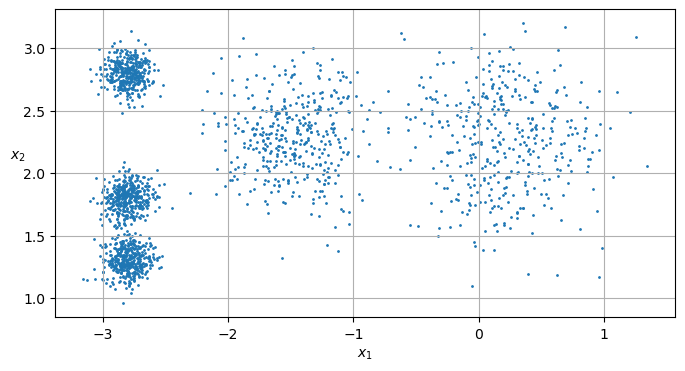

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.grid()
plt.show();

In [9]:
y_pred

array([1, 4, 0, ..., 2, 0, 4])

In [10]:
kmeans.labels_

array([1, 4, 0, ..., 2, 0, 4])

In [11]:
y_pred is kmeans.labels_

True

In [12]:
# central coordinates
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [13]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 2, 2])

In [14]:
X_new.shape, X.shape #sutun saylari eyni olmalidir

((4, 2), (2000, 2))

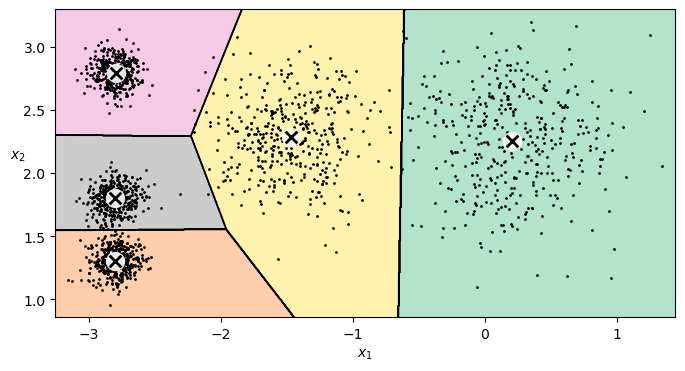

In [15]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)


   if show_xlabels:
       plt.xlabel("$x_1$")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("$x_2$", rotation=0)
   else:
       plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show();

In [16]:
kmeans.transform(X_new).round(2) #yeni yaratdigim dataset her bir kluster merkezinden mesafaesine kecir, 4 data (row) 5 cluster center-e mesafesini

array([[0.33, 2.89, 2.9 , 1.49, 2.81],
       [2.8 , 5.84, 5.85, 4.48, 5.81],
       [3.29, 1.71, 0.29, 1.69, 1.21],
       [3.22, 1.22, 0.36, 1.55, 0.73]])

In [17]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init = 1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

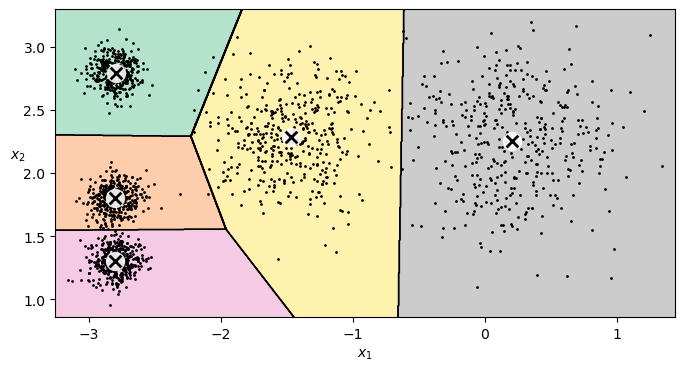

In [18]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [19]:
kmeans.inertia_ # her bir noqtenin kluster merkezlerinden mesafesinin ceminin ortalamasi

211.5985372581684

In [20]:
kmeans.score(X) 

-211.5985372581684

In [21]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init='random', n_init=10, random_state=42)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

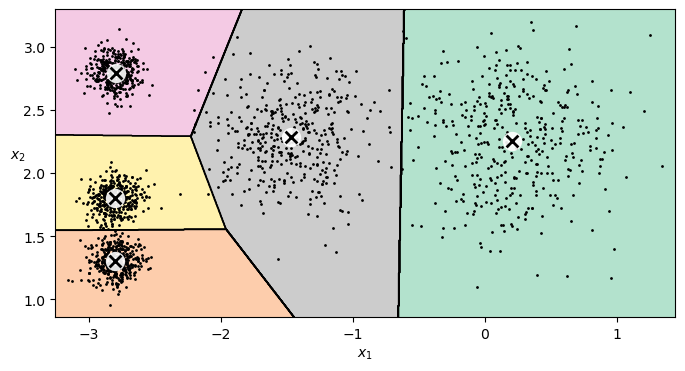

In [22]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show();

In [23]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

In [20]:
# formalar oval kimi olanda k-means yaxsi netice vermir

# Mini-Batch K-Means

In [24]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [25]:
# yaxsi terefleri ondadir ki daha az data uzerinde isleyir, amma bu accuracy-ni biraz asagi salir. Chox daha suretlidir

In [26]:
minibatch_kmeans.inertia_

211.65239850433204

In [27]:
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)
# plot_clusterer_comparison(kmeans_k3, kmeans_k8, "$k=8$")
plt.show();

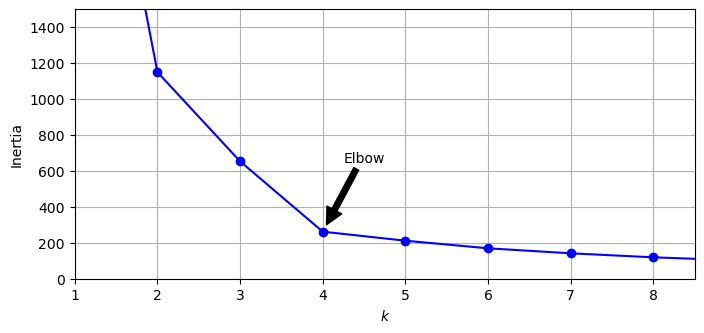

In [29]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650), arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1500])
plt.grid()
plt.show();

# Limits of K-Means

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


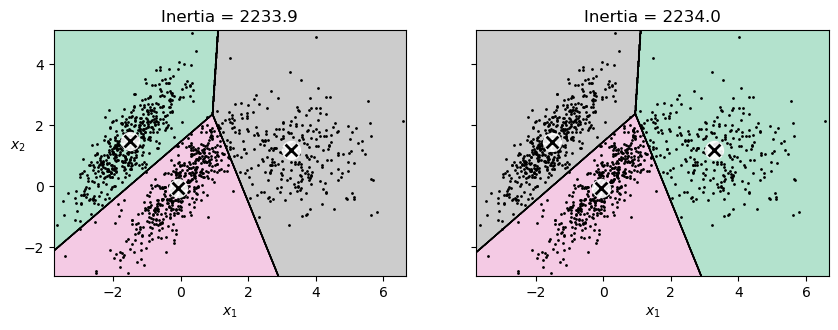

In [30]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4),(0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.347, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]             # r_ --> arraylari concat edir

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

plt.show()

In [31]:
import PIL

image = np.array(PIL.Image.open("ladybug.png"))
image.shape

(533, 800, 3)

In [32]:
image

array([[[ 25,  29,   2],
        [ 24,  28,   1],
        [ 24,  29,   0],
        ...,
        [ 57, 105,  21],
        [ 56, 103,  22],
        [ 52,  99,  19]],

       [[ 24,  28,   1],
        [ 23,  27,   0],
        [ 23,  27,   0],
        ...,
        [ 60, 108,  22],
        [ 59, 106,  25],
        [ 55, 102,  22]],

       [[ 23,  27,   2],
        [ 22,  26,   1],
        [ 22,  26,   0],
        ...,
        [ 66, 114,  28],
        [ 63, 111,  27],
        [ 58, 105,  24]],

       ...,

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 13,  20,   2],
        ...,
        [ 13,  61,   3],
        [  9,  56,   2],
        [  5,  51,   2]],

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 12,  19,   1],
        ...,
        [ 11,  59,   1],
        [  7,  54,   0],
        [  3,  49,   0]],

       [[ 13,  17,   0],
        [ 13,  17,   0],
        [ 11,  18,   0],
        ...,
        [ 10,  58,   0],
        [  5,  52,   0],
        [  2,  48,   0]]

In [33]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img  = segmented_img.reshape(image.shape)

In [34]:
X

array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0],
       ...,
       [10, 58,  0],
       [ 5, 52,  0],
       [ 2, 48,  0]], dtype=uint8)

In [35]:
segmented_img

array([[[ 5.83448628, 28.22616668,  1.47552886],
        [ 5.83448628, 28.22616668,  1.47552886],
        [ 5.83448628, 28.22616668,  1.47552886],
        ...,
        [55.88206518, 98.62346563, 14.79208777],
        [55.88206518, 98.62346563, 14.79208777],
        [55.88206518, 98.62346563, 14.79208777]],

       [[ 5.83448628, 28.22616668,  1.47552886],
        [ 5.83448628, 28.22616668,  1.47552886],
        [ 5.83448628, 28.22616668,  1.47552886],
        ...,
        [55.88206518, 98.62346563, 14.79208777],
        [55.88206518, 98.62346563, 14.79208777],
        [55.88206518, 98.62346563, 14.79208777]],

       [[ 5.83448628, 28.22616668,  1.47552886],
        [ 5.83448628, 28.22616668,  1.47552886],
        [ 5.83448628, 28.22616668,  1.47552886],
        ...,
        [55.88206518, 98.62346563, 14.79208777],
        [55.88206518, 98.62346563, 14.79208777],
        [55.88206518, 98.62346563, 14.79208777]],

       ...,

       [[ 5.83448628, 28.22616668,  1.47552886],
        [ 5

In [36]:
kmeans.cluster_centers_

array([[250.80339083, 238.65268971,   6.56603259],
       [  5.83448628,  28.22616668,   1.47552886],
       [ 55.88206518,  98.62346563,  14.79208777],
       [193.20797818,  54.13433345,  11.37470167],
       [ 25.47759236,  64.83281062,   4.31953567],
       [156.22887957, 160.67579389,  98.81396046],
       [ 94.89017515, 133.51803159,  40.11328915],
       [225.57151644, 185.02493849,   8.77650414]])

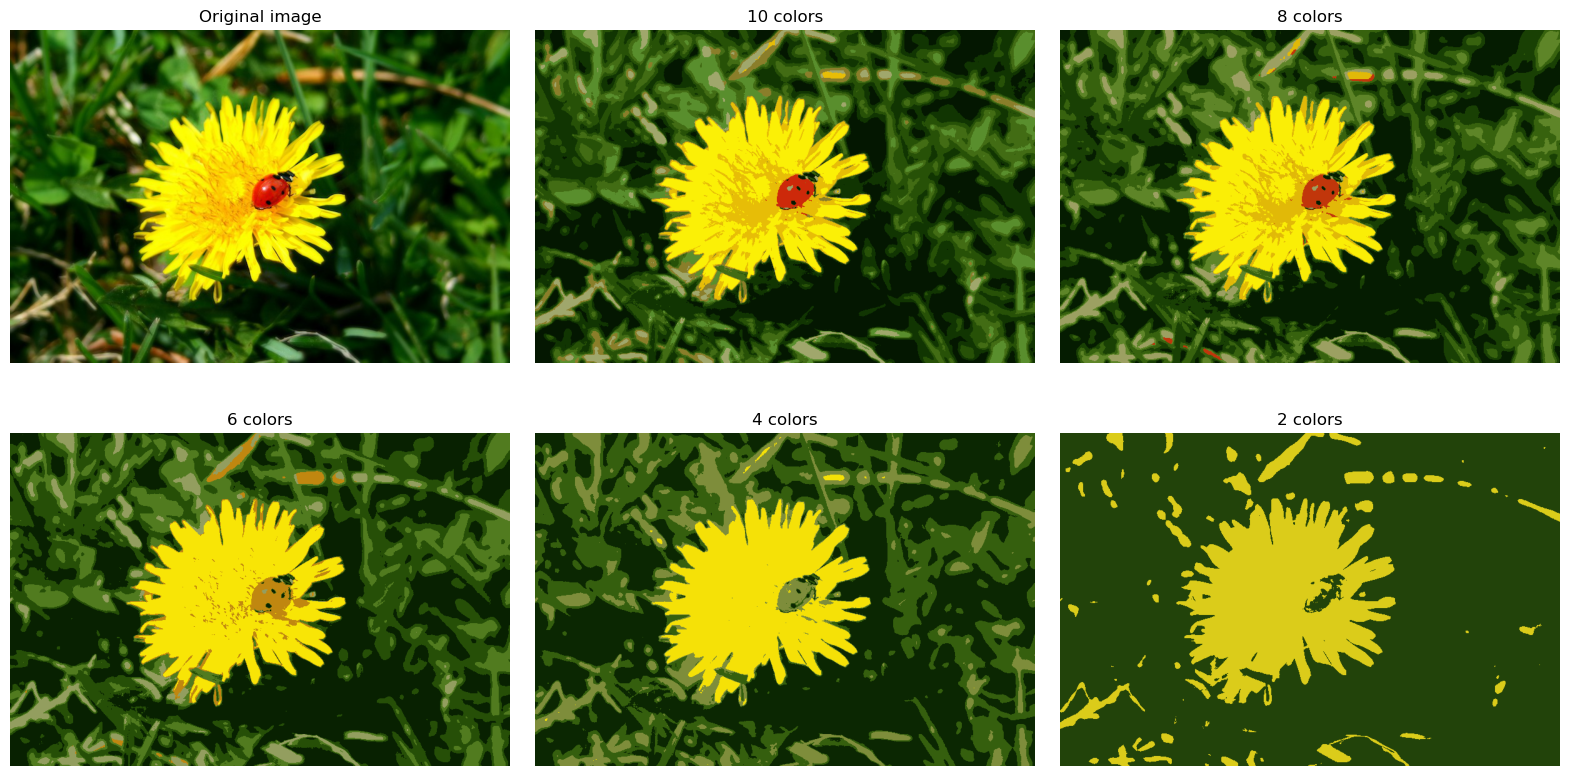

In [37]:
segmented_imgs = []

n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2  + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis("off")
    
plt.show();

In [38]:
from sklearn.datasets import fetch_olivetti_faces

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
olivetti_faces = fetch_olivetti_faces()

In [41]:
olivetti_faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit  #datanı təsadüfi şəkildə bölərək siniflər arasındakı paylanmanı qoruyur

In [45]:
# test datasetin ayrılması
strf_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strf_split.split(olivetti_faces.data, olivetti_faces.target))
X_train_valid = olivetti_faces.data[train_valid_idx]
y_train_valid = olivetti_faces.target[train_valid_idx]
X_test = olivetti_faces.data[test_idx]
y_test = olivetti_faces.target[test_idx]

In [47]:
# train və validation datasetlərinə ayrılma
strf_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strf_split.split(X_train_valid, y_train_valid))

In [48]:
# indekslərə əsasən bölmə
X_train, y_train = X_train_valid[train_idx], y_train_valid[train_idx]
X_valid, y_valid = X_train_valid[valid_idx], y_train_valid[valid_idx]

In [49]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((280, 4096), (80, 4096), (40, 4096), (280,), (80,), (40,))

In [50]:
# PCA
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=0.99)

In [52]:
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [53]:
pca.n_components_

199

In [54]:
# Apply K-Means Clustering

In [58]:
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

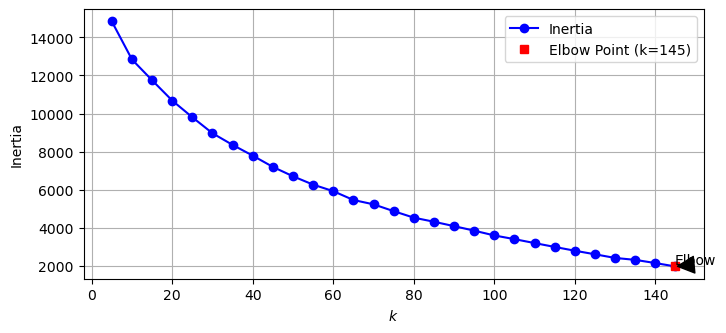

In [59]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_pca) for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]
best_index = np.argmin(inertias)  # ən aşağı inertia olan indeks
best_k = list(k_range)[best_index]  # ən yaxşı K dəyəri
best_inertia = inertias[best_index]  # ən yaxşı inertia dəyəri

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, 'bo-', label="Inertia")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, 'rs', label=f"Elbow Point (k={best_k})")
plt.annotate("", xy=(best_k, best_inertia), xytext=(best_k + 5, best_inertia + 100), arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(best_k + 5, best_inertia + 100, "Elbow", horizontalalignment="center")

plt.grid()
plt.legend()
plt.show();

In [60]:
best_model = kmeans_per_k[best_index]

Cluster 0


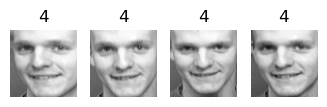

Cluster 1


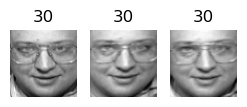

Cluster 2


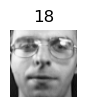

Cluster 3


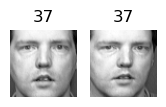

Cluster 4


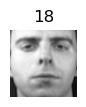

Cluster 5


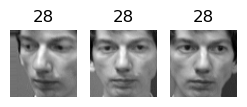

Cluster 6


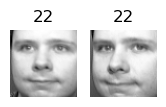

Cluster 7


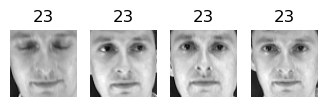

Cluster 8


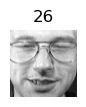

Cluster 9


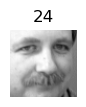

Cluster 10


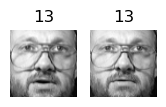

Cluster 11


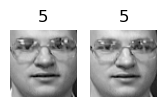

Cluster 12


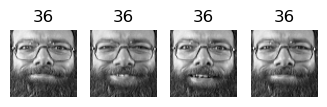

Cluster 13


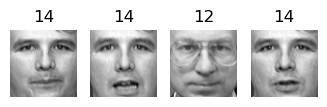

Cluster 14


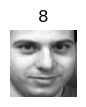

Cluster 15


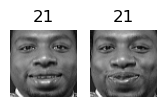

Cluster 16


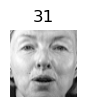

Cluster 17


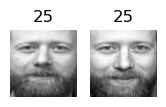

Cluster 18


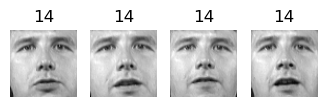

Cluster 19


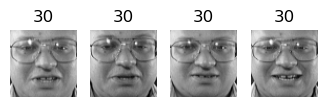

Cluster 20


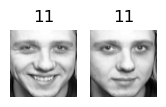

Cluster 21


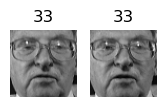

Cluster 22


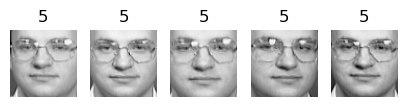

Cluster 23


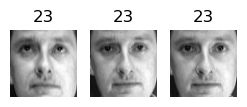

Cluster 24


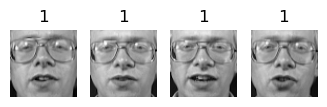

Cluster 25


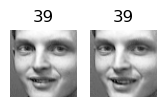

Cluster 26


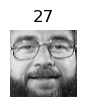

Cluster 27


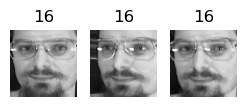

Cluster 28


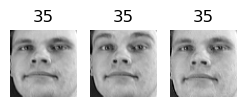

Cluster 29


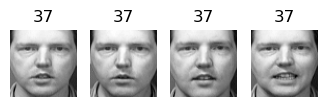

Cluster 30


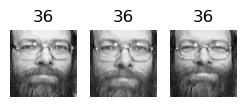

Cluster 31


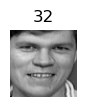

Cluster 32


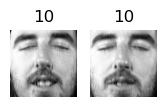

Cluster 33


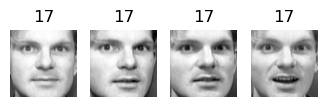

Cluster 34


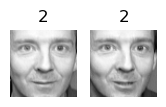

Cluster 35


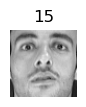

Cluster 36


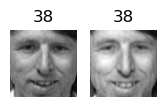

Cluster 37


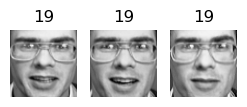

Cluster 38


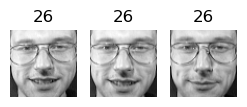

Cluster 39


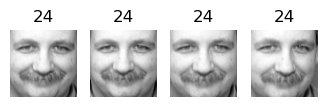

Cluster 40


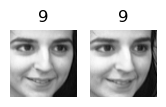

Cluster 41


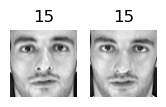

Cluster 42


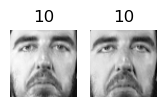

Cluster 43


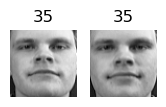

Cluster 44


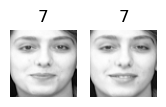

Cluster 45


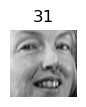

Cluster 46


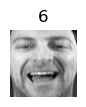

Cluster 47


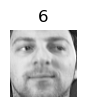

Cluster 48


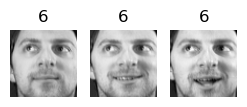

Cluster 49


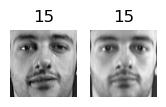

Cluster 50


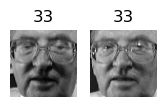

Cluster 51


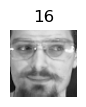

Cluster 52


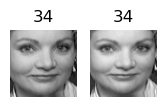

Cluster 53


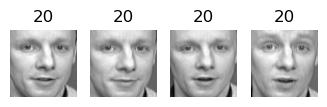

Cluster 54


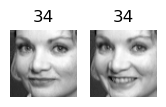

Cluster 55


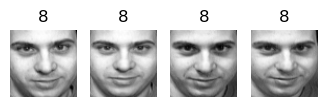

Cluster 56


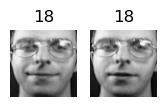

Cluster 57


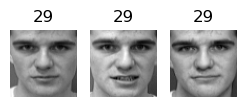

Cluster 58


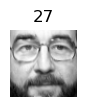

Cluster 59


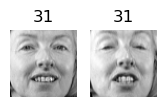

Cluster 60


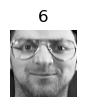

Cluster 61


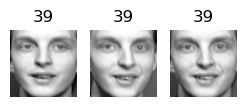

Cluster 62


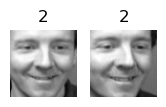

Cluster 63


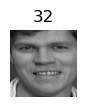

Cluster 64


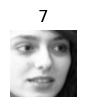

Cluster 65


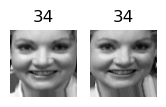

Cluster 66


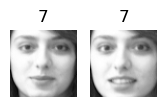

Cluster 67


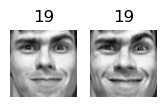

Cluster 68


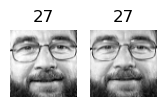

Cluster 69


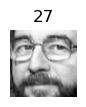

Cluster 70


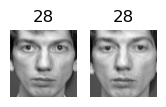

Cluster 71


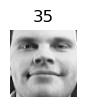

Cluster 72


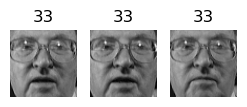

Cluster 73


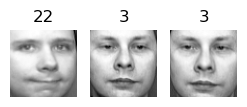

Cluster 74


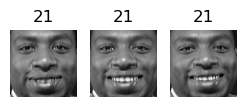

Cluster 75


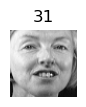

Cluster 76


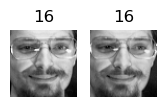

Cluster 77


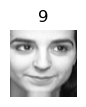

Cluster 78


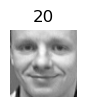

Cluster 79


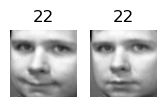

Cluster 80


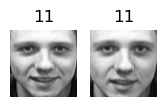

Cluster 81


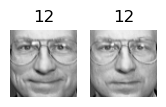

Cluster 82


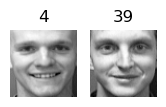

Cluster 83


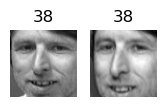

Cluster 84


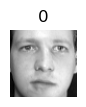

Cluster 85


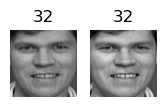

Cluster 86


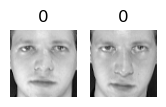

Cluster 87


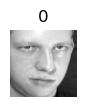

Cluster 88


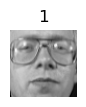

Cluster 89


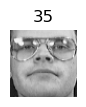

Cluster 90


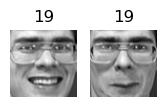

Cluster 91


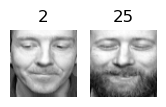

Cluster 92


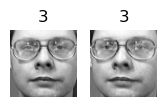

Cluster 93


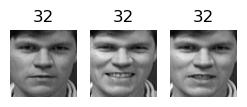

Cluster 94


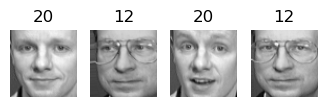

Cluster 95


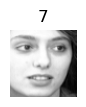

Cluster 96


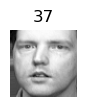

Cluster 97


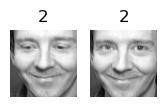

Cluster 98


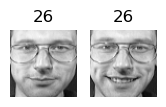

Cluster 99


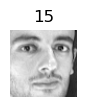

Cluster 100


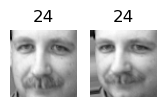

Cluster 101


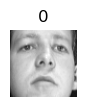

Cluster 102


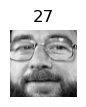

Cluster 103


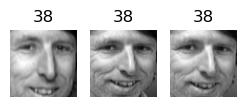

Cluster 104


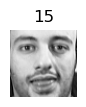

Cluster 105


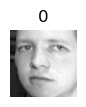

Cluster 106


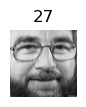

Cluster 107


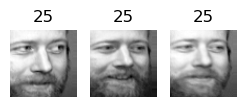

Cluster 108


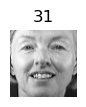

Cluster 109


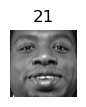

Cluster 110


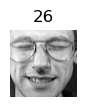

Cluster 111


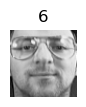

Cluster 112


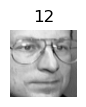

Cluster 113


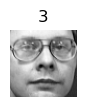

Cluster 114


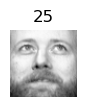

Cluster 115


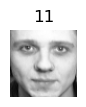

Cluster 116


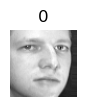

Cluster 117


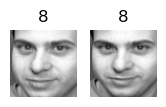

Cluster 118


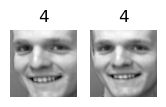

Cluster 119


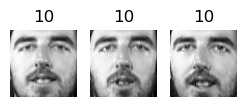

Cluster 120


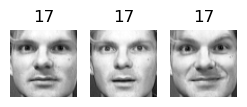

Cluster 121


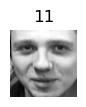

Cluster 122


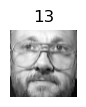

Cluster 123


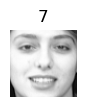

Cluster 124


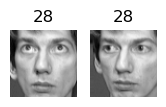

Cluster 125


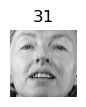

Cluster 126


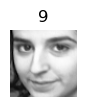

Cluster 127


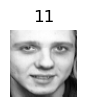

Cluster 128


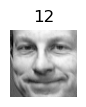

Cluster 129


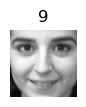

Cluster 130


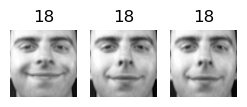

Cluster 131


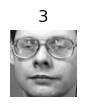

Cluster 132


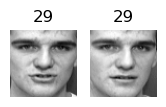

Cluster 133


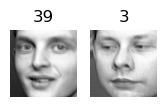

Cluster 134


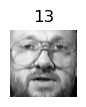

Cluster 135


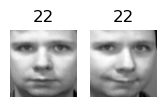

Cluster 136


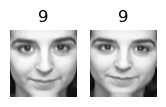

Cluster 137


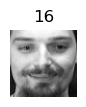

Cluster 138


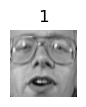

Cluster 139


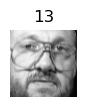

Cluster 140


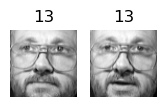

Cluster 141


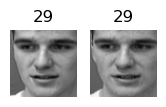

Cluster 142


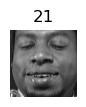

Cluster 143


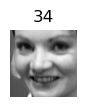

Cluster 144


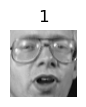

In [61]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# Clustering using Semi-supervised Learning

In [63]:
from sklearn.datasets import load_digits

In [71]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [74]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [75]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

In [76]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) #fit eden mesafeleri yoxlayir
representative_digit_idx = X_digits_dist.argmin(axis=0) # en az mesafe olan 50 merkeze yaxin noqteni gosterir 
X_representative_digits = X_train[representative_digit_idx]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


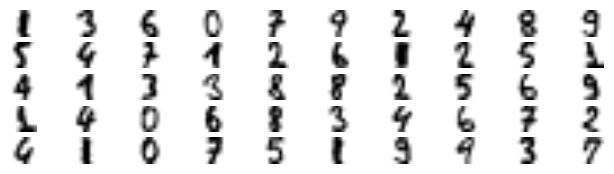

In [77]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis("off")

plt.show();

In [78]:
y_representative_digits = np.array([
    8,4,9,6,7,5,3,0,1,2,
    3,3,4,7,2,1,5,1,6,4,
    5,6,5,7,3,1,0,8,4,7,
    1,1,8,2,9,9,5,9,7,4,
    4,9,7,8,2,6,6,3,2,8
])

In [79]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.12090680100755667

In [80]:
log_reg.score(X_train, y_train)

0.105

In [108]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [109]:
y_representative_digits

array([8, 4, 9, 6, 7, 5, 3, 0, 1, 2, 3, 3, 4, 7, 2, 1, 5, 1, 6, 4, 5, 6,
       5, 7, 3, 1, 0, 8, 4, 7, 1, 1, 8, 2, 9, 9, 5, 9, 7, 4, 4, 9, 7, 8,
       2, 6, 6, 3, 2, 8])

In [110]:
kmeans.labels_

array([32, 41, 39, ..., 40, 40, 43])

In [111]:
log_reg = LogisticRegression(max_iter=10_00)
log_reg.fit(X_train, y_train_propagated)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [112]:
log_reg.score(X_test, y_test)

0.11586901763224182

In [113]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [114]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [115]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.11335012594458438

In [116]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.1

In [117]:
# np.percentile is good to find anomalities

# DBSCAN

In [118]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [119]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [120]:
# eps boyuk olanda daha genish etrafa baxir

In [122]:
# min_samples o demekdir ki bir datanin etrafinda en az neche noqte olsa onu merkez kimi goturur ve DBSCAN boyuk olculu datalarda 
# effektiv deyil

In [123]:
dbscan.labels_[:10] #-1ler anomalitylerdi

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [124]:
dbscan.core_sample_indices_[:10] #indexlerdi, amma burda anomalities yoxdu

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [125]:
dbscan.components_ #indices-in hansi koordinatlarda yerlesdiyi gorunur

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

# Gaussian Mixtures

In [130]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [131]:
from sklearn.mixture import GaussianMixture

In [135]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [136]:
gm.weights_ # her bir merkez noqtesine gore dushme ehtimalidir

array([0.39025715, 0.40007391, 0.20966893])

In [137]:
gm.means_ #merkezlerin koordinatidir

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [139]:
gm.covariances_ #yayilmasi (sigma)

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [140]:
gm.n_iter_ #neche defe run olub

4

In [141]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [142]:
gm.predict_proba(X).round(3) #neche faiz duhunursenki hemin merkeze aiddi

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

In [143]:
# Active learning - en ehemiyyetli oldugunu dusunduyumuz datalari labelleyirik
# meselen modelin en az emin oldugu instancelar uzerinde labeling ede bilerik en pis oldugu klass uzre labeling ede bilerik

In [144]:
X_new, y_new = gm.sample(6) #suni data yaradiriq
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [145]:
y_new

array([0, 0, 1, 2, 2, 2])